In [1]:
import os
import csv
from matplotlib import rc
import matplotlib.pyplot as plt

In [2]:
ansatz_str = 'UCCSD'
path = f'potential_well_noise_model_{ansatz_str}'
optimizer_str = ['COBYLA_128', 'COBYLA_16384']

In [3]:
rc('font', size=12, **{'family': 'serif', 'serif': ['Times New Roman']})

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

In [4]:
files = [file for file in os.listdir(f'{path}') if file.endswith('.csv')]
for i, file in enumerate(files):
    alpha  = []
    energy = []

    with open(f'{path}/{file}', newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)

        for row in reader:
            alpha.append(float(row[0]))
            energy.append(float(row[1]))

In [5]:
for optimizer in optimizer_str:
    globals()[f'alpha_{optimizer}'] = []
    globals()[f'energy_{optimizer}'] = []

    files = [file for file in os.listdir(f'{path}/results_{optimizer}') if file.endswith('.csv')]

    for index, file in enumerate(files):

        globals()[f'alpha_{optimizer}'].append([])
        globals()[f'energy_{optimizer}'].append([])
        
        with open(f'{path}/results_{optimizer}/{file}', 'r') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)
            for row in reader:
                globals()[f'alpha_{optimizer}'][index].append(float(row[0]))
                globals()[f'energy_{optimizer}'][index].append(float(row[1]))

    globals()[f'files_names_{optimizer}'] = [file.split('.')[0] for file in files]

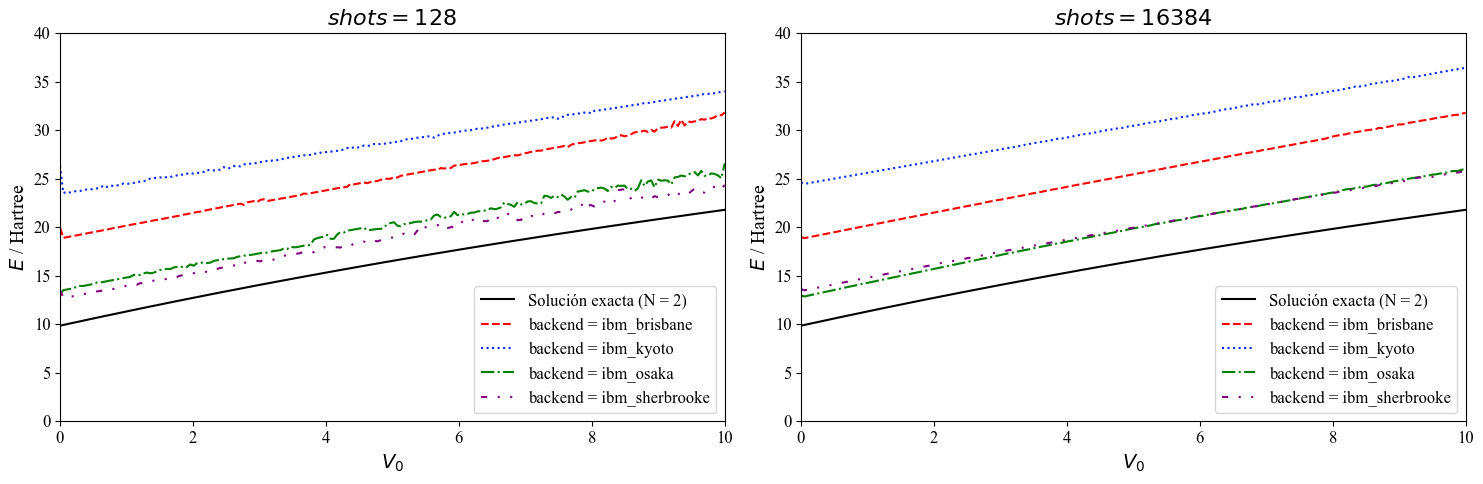

In [6]:
colors = ['red', '#0027FF', 'green', 'purple']
lines = ['--', ':', '-.', (0, (3, 5, 1, 5, 1, 5))]

rows = 1
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 5))

for i, optimizer in enumerate(optimizer_str):
    row = 1
    column = i % columns

    for n, file in enumerate(globals()[f'files_names_{optimizer}']):
        if n == 0:
            axs[column].plot(alpha, energy,
                             color='black', marker='', linestyle='-', label='Solución exacta (N = 2)')
        
        axs[column].plot(globals()[f'alpha_{optimizer}'][n], globals()[f'energy_{optimizer}'][n],
                         color=colors[n], marker='', linestyle=lines[n], label=f'{file.split('=')[0]} = {file.split('=')[-1]}')
        axs[column].set_title(f'$shots={optimizer.split('_')[-1]}$', fontsize=16)
        axs[column].set_xlabel('$V_0$', fontsize=14)
        axs[column].set_ylabel('$E$ / Hartree', fontsize=14)
        axs[column].grid(False)
        axs[column].set_xlim(0, 10)
        axs[column].set_ylim(0, 40)
        axs[column].legend(loc='lower right')
        

plt.tight_layout()
plt.savefig(f'{path}/potential_well_noise_model_{ansatz_str}_plot.png')
plt.savefig(f'../../../TFG/Figuras/potential_well_noise_model_{ansatz_str}_plot.png')
plt.show()